
___
# Random Forest Project Loan Data Prediction



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
loans=pd.read_csv(r"C:\Users\nitin\OneDrive\Documents\Machine Learning for Portfolio\Decision Trees & Random Forest\loan_data.csv")

In [8]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis



Text(0.5, 0, 'FICO')

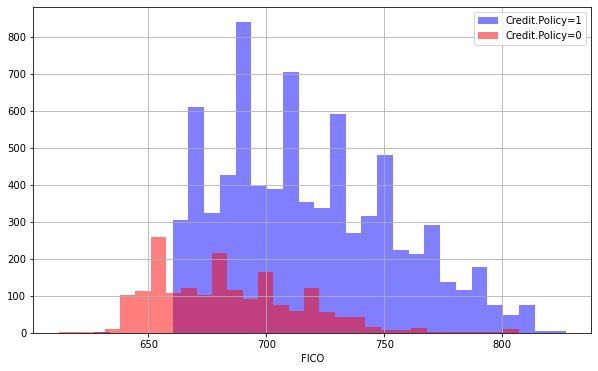

In [11]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

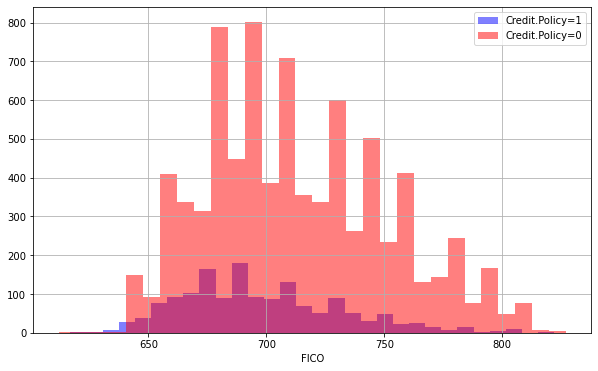

In [12]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

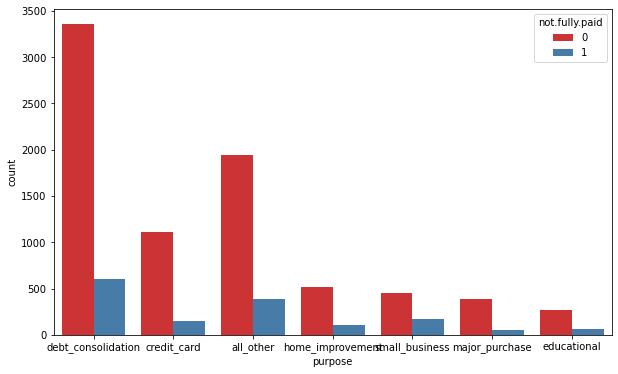

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=loans,x="purpose",hue="not.fully.paid",palette="Set1")

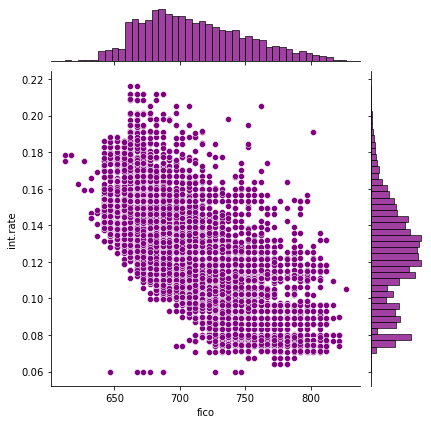

In [14]:
sns.jointplot(data=loans,x="fico",y="int.rate",color="purple")

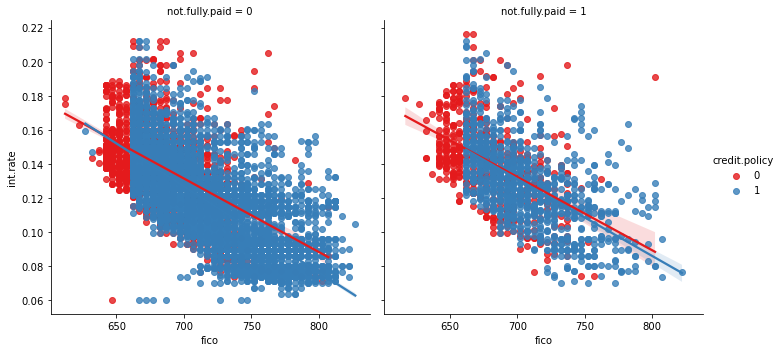

In [15]:
sns.lmplot(data=loans,x="fico",y="int.rate",hue="credit.policy",palette="Set1",col="not.fully.paid")

## Data Review

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [17]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [18]:
loans.head(15)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## Creating Categorical Features



In [19]:
cat_feats=loans['purpose']

In [20]:
dummy_purpose=pd.get_dummies(cat_feats,drop_first=True)

In [21]:
data=pd.concat((dummy_purpose,loans),axis=1)

In [22]:
data.drop(("purpose"),axis=1,inplace=True)

In [23]:
final_data=data

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_card         9578 non-null   uint8  
 1   debt_consolidation  9578 non-null   uint8  
 2   educational         9578 non-null   uint8  
 3   home_improvement    9578 non-null   uint8  
 4   major_purchase      9578 non-null   uint8  
 5   small_business      9578 non-null   uint8  
 6   credit.policy       9578 non-null   int64  
 7   int.rate            9578 non-null   float64
 8   installment         9578 non-null   float64
 9   log.annual.inc      9578 non-null   float64
 10  dti                 9578 non-null   float64
 11  fico                9578 non-null   int64  
 12  days.with.cr.line   9578 non-null   float64
 13  revol.bal           9578 non-null   int64  
 14  revol.util          9578 non-null   float64
 15  inq.last.6mths      9578 non-null   int64  
 16  delinq

## Train Test Split



In [25]:
final_data.columns

Index(['credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business', 'credit.policy', 'int.rate',
       'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=final_data[['credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business','credit.policy','int.rate',
       'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]
y=final_data['not.fully.paid']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training a Decision Tree Model



In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions & Evaluations

In [32]:
predictions=dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(predictions,y_test))
print("\n")
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2370
           1       0.21      0.20      0.20       504

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.72      0.73      0.73      2874



[[2003  367]
 [ 405   99]]


## Training the Random Forest model



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
r_forest=RandomForestClassifier()

In [37]:
r_forest.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
predictions= r_forest.predict(X_test)

## Predictions and Evaluation



In [39]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2851
           1       0.02      0.39      0.04        23

    accuracy                           0.84      2874
   macro avg       0.51      0.62      0.47      2874
weighted avg       0.99      0.84      0.90      2874



In [40]:
print(confusion_matrix(predictions,y_test))

[[2394  457]
 [  14    9]]
